# Import Necessary library

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


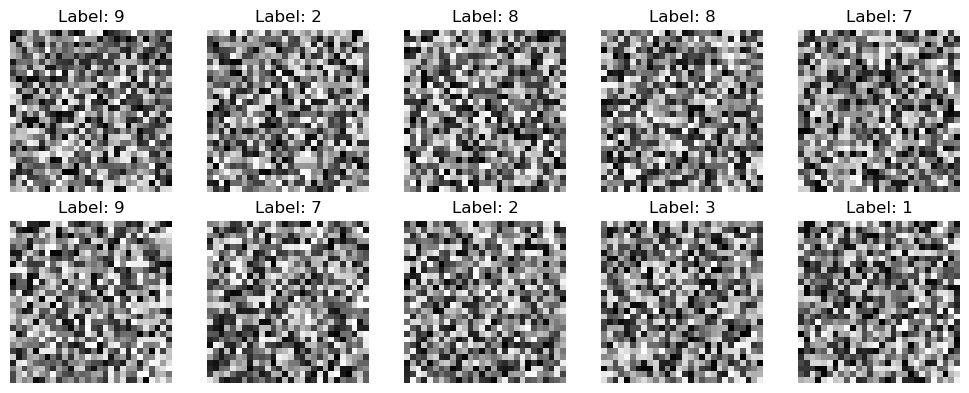

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar
def plot_mnist_samples(x, y, num_samples=10):
    plt.figure(figsize=(10, 4))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        # Reshape the image data to (28, 28) if necessary
        image = x[i].reshape(28, 28)
        plt.imshow(image, cmap='gray')
        plt.title(f'Label: {y[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming x_train has shape (num_samples, 28, 28, 1, 1)
x_train = np.random.rand(100, 28, 28, 1, 1)  # Example data
y_train = np.random.randint(0, 10, 100)  # Example labels
plot_mnist_samples(x_train, y_train, num_samples=10)

In [5]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data to fit the model input requirements
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [13]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Create Model

In [14]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='relu'))   

c:\Users\WAYCOM\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np

# Example data
x_train = np.random.rand(100, 28 * 28)  # Example flattened data
y_train = np.random.randint(0, 10, 100)  # Example labels
x_test = np.random.rand(20, 28 * 28)  # Example flattened data
y_test = np.random.randint(0, 10, 20)  # Example labels

# Define the model
model = Sequential([
    Flatten(input_shape=(28 * 28,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5


c:\Users\WAYCOM\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 245ms/step - accuracy: 0.1147 - loss: 2.5150 - val_accuracy: 0.2000 - val_loss: 2.5548
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2196 - loss: 2.1813 - val_accuracy: 0.0000e+00 - val_loss: 2.5815
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2302 - loss: 2.0941 - val_accuracy: 0.1000 - val_loss: 2.4982
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3014 - loss: 1.9318 - val_accuracy: 0.1000 - val_loss: 2.6744
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3535 - loss: 1.9231 - val_accuracy: 0.1000 - val_loss: 2.6186


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


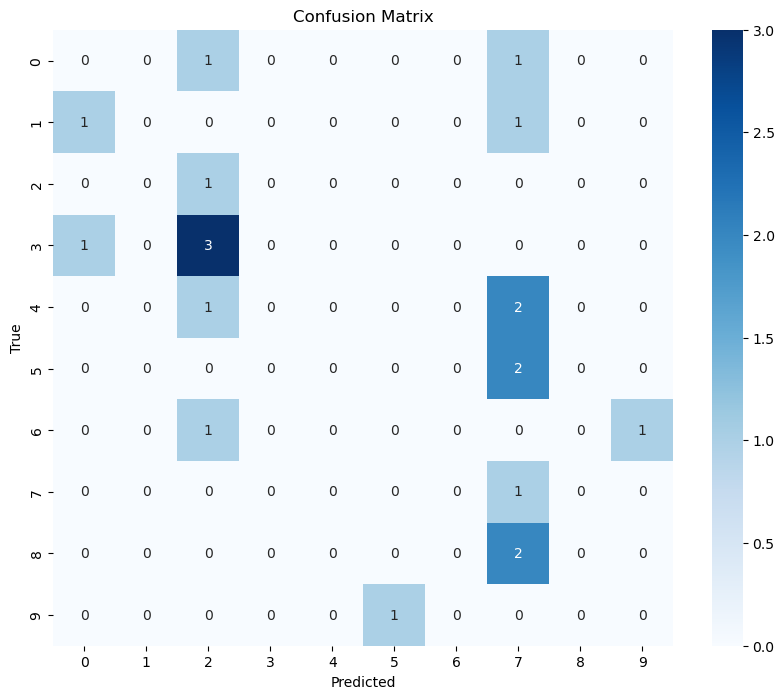

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Predict the labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()